In [3]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
import astropy.constants as c
import itertools
%matplotlib inline

dturb = '/Users/roxanachira/Dropbox/chira2018/pics/data/'

In [4]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [5]:
fcloud = ['M3','M4','M8']
fjeans = ['04','08','32']
fdir   = ['x','y','z']

ms = 10
lw = 7

xlim     = [ 0.0,6.2]
ylimzeta = [-0.5,1.8]

color = ['red','green','blue']

snM3 = np.array([ 0.7,1.2,1.8,2.6,3.8,4.3 ])
snM4 = np.array([ 0.4,2.1,3.8,5.3 ])
snM8 = np.array([ 0.6 ])

dsnM3 = np.array([ 100.,100.,79.85,56.73,100.,100. ]) * c.pc.to('km').value
dsnM4 = np.array([ 79.65,59.43,53.44,67.62 ]) * c.pc.to('km').value
dsnM8 = np.array([ 44.47 ]) * c.pc.to('km').value

snspeed = 100. / u.second.to('a')

snaM3 = snM3 + 1e-6 * dsnM3 / snspeed
snaM4 = snM4 + 1e-6 * dsnM4 / snspeed
snaM8 = snM8 + 1e-6 * dsnM8 / snspeed

mabM3 = np.array([ 1.2,2.8 ])
maeM3 = np.array([ 2.4,3.9 ])
mabM4 = np.array([ 1.5 ])
maeM4 = np.array([ 2.8 ])
mabM8 = np.array([ 1.0,2.5 ])
maeM8 = np.array([ 2.0,3.2 ])

(a) normal
(b) 1D
(c) density threshold
(d) density weighting


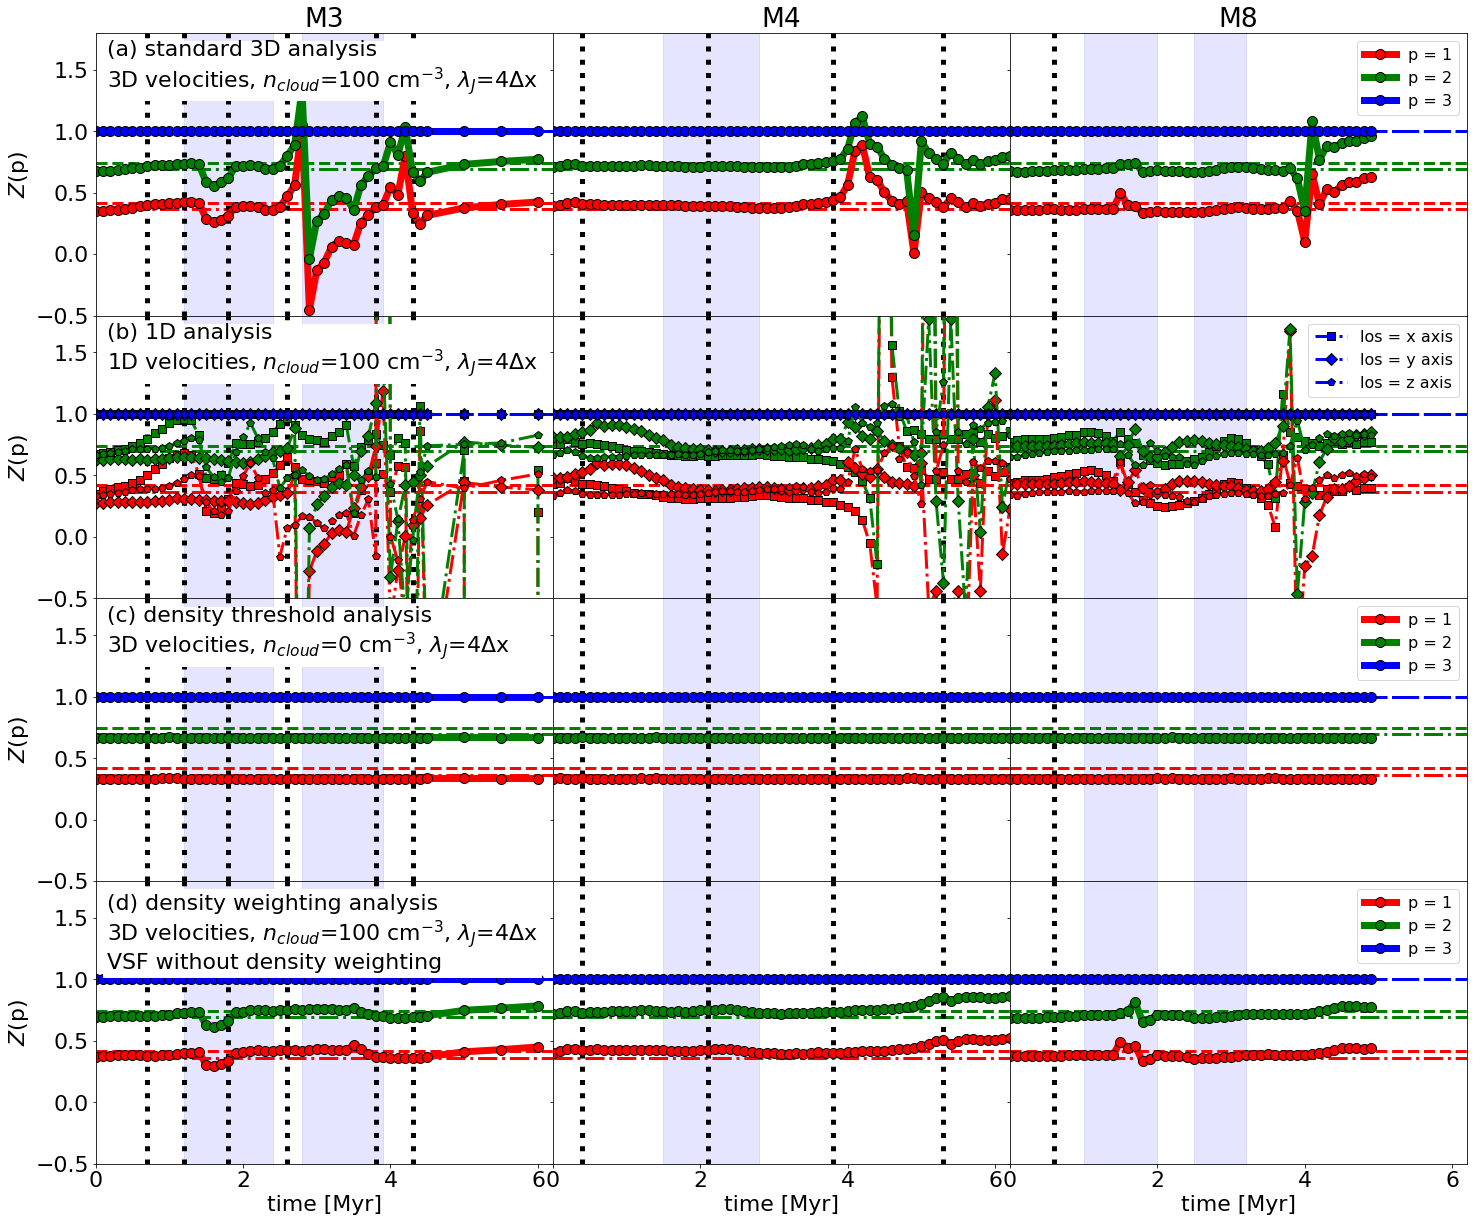

In [8]:
print("(a) normal")

dvsf  = dturb + 'vsfhr04/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=4,sharex=True,sharey=True,figsize=(21,18))

for i,j,p in itertools.product(range(4),range(3),range(1,4)):
    ax[i,j].plot(xlim,np.zeros(2)+zboldyrev(p),ls='--',lw=lw-4,color=color[p-1])
    ax[i,j].plot(xlim,np.zeros(2)+zshe(p),ls='-.',lw=lw-4,color=color[p-1])

    
for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[0,icloud].set_xlim(xlim)
    ax[0,icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[0,icloud].set_ylabel('$Z$(p)')
        for j in range(len(snM3)):
            ax[0,icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[0,icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[0,icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[0,icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[0,icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[0,icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        zetap = zetap/zeta3
        ax[0,icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[0,icloud].set_title(cloud)
    if(icloud == 0): 
        txtstr = "(a) standard 3D analysis\n3D velocities, $n_{cloud}$=100 cm$^{-3}$, $\lambda_{J}$=4$\Delta$x"
        ax[0,icloud].text(0.15,1.7,txtstr,alpha=1.0,backgroundcolor="white",verticalalignment='top')
    if(icloud == 2): ax[0,icloud].legend(loc=0,fontsize=16)
        
###################################################################################
print("(b) 1D")

dvsf  = dturb + 'vsfhr04_1d/'


for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[1,icloud].set_xlim(xlim)
    ax[1,icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[1,icloud].set_ylabel('$Z$(p)')
        for j in range(len(snM3)):
            ax[1,icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[1,icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[1,icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[1,icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[1,icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[1,icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    for idir in fdir:
        ifile = glob((dvsf+'zeta_fitted_%s_%s.out' % (cloud,idir)))[0]
        time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
        time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
        
        if(idir == fdir[0]): marker = 's'
        elif(idir == fdir[1]): marker = 'D'
        elif(idir == fdir[2]): marker = 'p'
        
        ax[1,icloud].plot(time[0]-5,ylimzeta[0]-5,ms=ms-2,lw=lw-4,color=color[p-1],marker=marker,ls='-.',markeredgecolor='black',label=('los = %s axis' % (idir)))

        for p in range(1,4):
            if(p==1): zetap = zeta1
            if(p==2): zetap = zeta2
            if(p==3): zetap = zeta3
            zetap = zetap/zeta3
            ax[1,icloud].plot(time,zetap,ms=ms-2,lw=lw-4,color=color[p-1],marker=marker,ls='-.',markeredgecolor='black')
        
    if(icloud == 0): 
        txtstr = "(b) 1D analysis\n1D velocities, $n_{cloud}$=100 cm$^{-3}$, $\lambda_{J}$=4$\Delta$x"
        ax[1,icloud].text(0.15,1.7,txtstr,alpha=1.0,backgroundcolor="white",verticalalignment='top')
    if(icloud == 2): ax[1,icloud].legend(loc=0,fontsize=16)


###################################################################################
print("(c) density threshold")

dvsf  = dturb + 'vsfhr04_rand/'

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[2,icloud].set_xlim(xlim)
    ax[2,icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[2,icloud].set_ylabel('$Z$(p)')
        for j in range(len(snM3)):
            ax[2,icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[2,icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[2,icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[2,icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[2,icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[2,icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        zetap = zetap/zeta3
        ax[2,icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
    if(icloud == 0): 
        txtstr = "(c) density threshold analysis\n3D velocities, $n_{cloud}$=0 cm$^{-3}$, $\lambda_{J}$=4$\Delta$x"
        ax[2,icloud].text(0.15,1.7,txtstr,alpha=1.0,backgroundcolor="white",verticalalignment='top')
    if(icloud == 2): ax[2,icloud].legend(loc=0,fontsize=16)

        
###################################################################################
print("(d) density weighting")
        
dvsf  = dturb + 'vsfhr04_now/'


for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ax[3,icloud].set_xlim(xlim)
    ax[3,icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[3,icloud].set_ylabel('$Z$(p)')
        for j in range(len(snM3)):
            ax[3,icloud].plot(np.zeros(2)+snM3[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM3)):
            ax[3,icloud].fill_between(np.array([mabM3[j],maeM3[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 1):
        for j in range(len(snM4)):
            ax[3,icloud].plot(np.zeros(2)+snM4[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM4)):
            ax[3,icloud].fill_between(np.array([mabM4[j],maeM4[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)

    if(icloud == 2):
        for j in range(len(snM8)):
            ax[3,icloud].plot(np.zeros(2)+snM8[j],np.array(ylimzeta),ls=':',color='black',lw=5)
        for j in range(len(mabM8)):
            ax[3,icloud].fill_between(np.array([mabM8[j],maeM8[j]]),np.zeros(2)+ylimzeta[0],np.zeros(2)+ylimzeta[1],color='blue',alpha=0.1)
 
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): zetap = zeta1
        if(p==2): zetap = zeta2
        if(p==3): zetap = zeta3
        zetap = zetap/zeta3
        ax[3,icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
    ax[3,icloud].set_xlabel('time [Myr]')
    if(icloud == 0): 
        txtstr = "(d) density weighting analysis\n3D velocities, $n_{cloud}$=100 cm$^{-3}$, $\lambda_{J}$=4$\Delta$x\nVSF without density weighting"
        ax[3,icloud].text(0.15,1.7,txtstr,alpha=1.0,backgroundcolor="white",verticalalignment='top')
    if(icloud == 2): ax[3,icloud].legend(loc=0,fontsize=16)
       
    
    
fig.tight_layout(pad=2)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('z_all_nojeans.pdf')